In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime ,timedelta

In [3]:
# importing the data

transaction = pd.read_excel('/content/drive/MyDrive/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',header=1)
newcustomer = pd.read_excel('/content/drive/MyDrive/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',header=1)
demo = pd.read_excel('/content/drive/MyDrive/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',header=1)
location = pd.read_excel('/content/drive/MyDrive/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',header=1)

In [4]:
# merging the demographic data and location data.

demographic = pd.merge(demo,location,how="inner",on='customer_id')

In [5]:
# droping the fields that are not important for analysis

demographic.drop(['first_name', 'last_name', 'default', 'country', 'address','postcode', 'job_title'], axis =1 , inplace=True)
location.drop(['country'], axis = 1, inplace=True)

newcustomer.drop(['first_name','last_name','address','postcode','country','Unnamed: 16','job_title','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],
                 axis=1,inplace=True)

# cleaning of the demographic data

basis of age, past purchases, job industry of the customer, income, car ownership, brand distribution, 

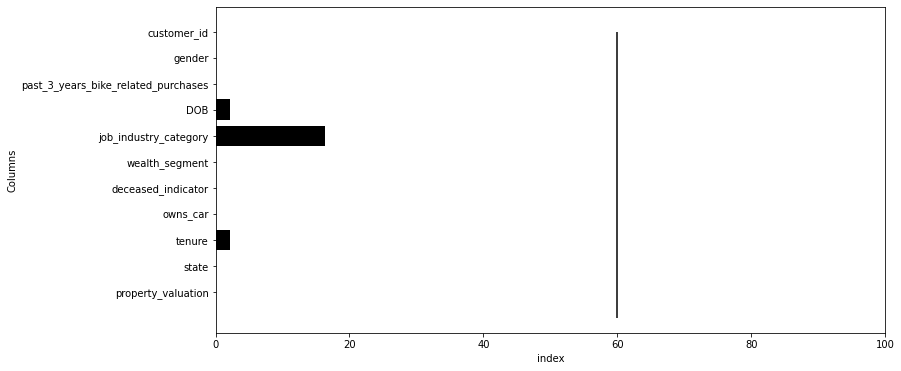

In [6]:
# the percentage of missing observations in every columns

def missing(data):
  percentage,name = [],[]
  for i in range(len(data.columns)):
    percent = round(len(data[data[data.columns[i]].isnull()])/len(data)*100,2)
    percentage.append(percent)
    name.append(data.columns[i])  
  import seaborn as sns
  plt.figure(figsize=(12,6))
  sns.barplot(y=0,x='index',data=pd.DataFrame(name,percentage).reset_index(),color='black')
  plt.xlim(0,100)
  plt.vlines(60,0,len(data.columns))
  plt.ylabel('Columns')
  plt.show()

missing(demographic)
# if it is possible to print which columns have missing values and the percentage of missing, maybe the data type od the columns ?

In [7]:
demographic['age'] = demographic['DOB'].apply(lambda x: 2017 - x.year) # transaction year is unique = 2017
demographic.loc[demographic['age'] > 100,'age'] = 40 # people do not live over 170 yrs.
demographic['age'].fillna(40, inplace=True) # as it is the median, mean and mode 
demographic['tenure'].fillna(11, inplace=True) # used median to impute
demographic['job_industry_category'].fillna('Unknown', inplace=True) # difficult to find the industry as in entertainment there was nurse what??

In [8]:
# data transformation for newcustomer
newcustomer['age'] = newcustomer['DOB'].apply(lambda x: 2017 - x.year) 
newcustomer.loc[newcustomer['age'] > 100,'age'] = 40
newcustomer['age'].fillna(40, inplace=True) 
newcustomer['job_industry_category'].fillna('Unknown', inplace=True)
newcustomer['tenure'].fillna(11, inplace=True)

In [9]:
# uniforming the representation of gender.

def uniform_gender(col):
  if re.match('^F+', col):
    return 'Female'
  elif re.match('^M+', col):
    return 'Male'
  else:
    return 'Unknown'

demographic['gender'] = demographic['gender'].apply(lambda x: uniform_gender(x))

In [10]:
# uniforming the representation of state.

def uniform_state(col):
  if col == 'NSW':
    return 'New South Wales'
  elif col == 'QLD':
    return 'Queensland'
  elif col == 'VIC':
    return 'Victoria'
  else:
    return col

demographic['state'] = demographic['state'].apply(lambda x: uniform_state(x))

In [11]:
demographic.drop(demographic[demographic['deceased_indicator'] != 'N'].index, inplace=True)
newcustomer.drop(newcustomer[newcustomer['deceased_indicator'] != 'N'].index, inplace=True)

In [12]:
# droping the columns that i will not be using now
demographic.drop([ 'DOB','deceased_indicator'], axis=1, inplace=True)
newcustomer.drop([ 'DOB','deceased_indicator'], axis=1, inplace=True)

# cleaning of the transaction data

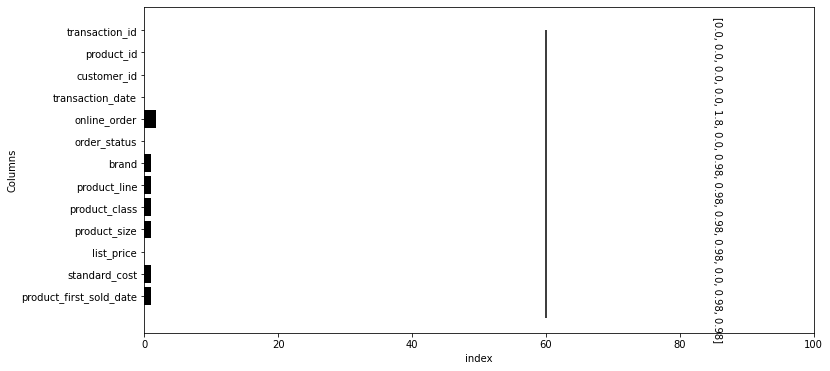

In [13]:
# the percentage of missing observations in every columns

def missing(data):
  percentage,name = [],[]
  for i in range(len(data.columns)):
    percent = round(len(data[data[data.columns[i]].isnull()])/len(data)*100,2)
    percentage.append(percent)
    name.append(data.columns[i])  
  import seaborn as sns
  plt.figure(figsize=(12,6))
  sns.barplot(y=0,x='index',data=pd.DataFrame(name,percentage).reset_index(),color='black')
  plt.text(y=14, x = 85, s = percentage, rotation=-90 )        # NAH
  plt.xlim(0,100)
  plt.vlines(60,0,len(data.columns))
  plt.ylabel('Columns')
  plt.show()

missing(transaction)

In [14]:
transaction['online_order'].fillna(0, inplace=True) # filled with 0

In [15]:
transaction.dropna(inplace=True) # as all the missing values are from the same observation

In [16]:
# as the product_first_sold_date is not in datetime format so need to format that and I only want the number of years is was sold first.
def format_date(col):
  try:
    return 2017 - ( datetime.strptime('1900-01-01', '%Y-%m-%d') + timedelta(days=col) ).year
  except:
    return None
#### this is an importtant function.

In [17]:
transaction['lasted_for_years'] = transaction['product_first_sold_date'].apply( lambda x: format_date(x))

In [18]:
# assuming that list_price = actual price, standard_cost = sales price, so thier difference will be discount given.
transaction['discount_amt'] = transaction['list_price'] - transaction['standard_cost']

In [19]:
transaction['transaction_date'].apply(lambda x: x.year).value_counts() # to find the different years for the data.

2017    19803
Name: transaction_date, dtype: int64

In [20]:
transaction.drop('product_first_sold_date',1,inplace=True)

# analysis

## analysis of demographic data

In [21]:
demographic.head(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,1,Female,93,Health,Mass Customer,Yes,11.0,New South Wales,10,64.0
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,New South Wales,10,37.0


In [22]:
# Distribution for categorical variable
demographic['state'].value_counts(normalize = True)

New South Wales    0.535053
Victoria           0.255383
Queensland         0.209564
Name: state, dtype: float64

40.0


Text(0.5, 0.98, 'Analysis for age')

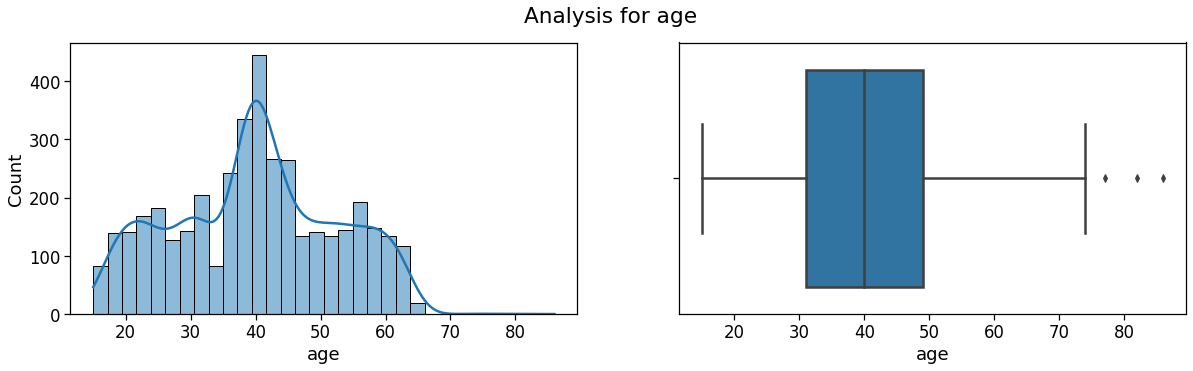

In [46]:
# univariate analysis for numerical variables

i = 'age'

print(demographic[i].median())
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, axs = plt.subplots(ncols = 2, figsize=(20,5))

sns.histplot(demographic[i], kde=True, ax=axs[0])
sns.boxplot(demographic[i], ax=axs[1])

plt.suptitle('Analysis for '+ i )

In [36]:
# select the two columns 
j = 'owns_car' # the column that will be explored more, all the categories of this column will be explored.
i = 'wealth_segment'  # the column whose value will not change

on = 'Yes' # the fixed category of j

print(demographic.groupby([i, j]).size(), '\n')
for k in range(len(demographic[i].unique())):
  try:
    print(demographic[i].unique()[k],'->',demographic.groupby([i, j]).size()[demographic[i].unique()[k],on]/demographic[i].value_counts()[demographic[i].unique()[k]] * 100)
  except:
    print(demographic[i].unique()[k],'->',0)

wealth_segment     owns_car
Affluent Customer  No           468
                   Yes          510
High Net Worth     No           500
                   Yes          520
Mass Customer      No          1007
                   Yes          989
dtype: int64 

Mass Customer -> 49.54909819639279
Affluent Customer -> 52.14723926380368
High Net Worth -> 50.98039215686274


In [37]:
# mean and median for different categories
demographic.groupby(['property_valuation']).agg(mean=('age',np.mean), median=('age',np.median)) 

,mean,median
property_valuation,,
1,40.357143,40.0
2,39.377622,39.0
3,39.989130,40.0
4,39.060748,40.0
5,38.395556,38.0
6,39.268908,40.0
7,39.987780,40.0
8,40.388545,40.0
9,40.921175,41.0


Text(0.5, 1.0, 'relation ship between tenure and age')

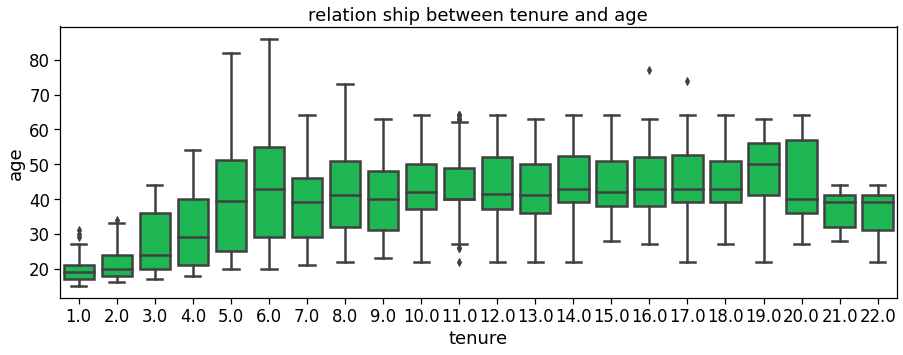

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(y='age', x='tenure', data=demographic, color='#06cf4c')
plt.title('relation ship between tenure and age')

# if age is more the tenure will tend to be more

## analysis of transaction data

In [27]:
transaction.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,lasted_for_years,discount_amt
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,5,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,3,1702.55


In [28]:
# distribution for categorical variable
transaction['product_line'].value_counts(normalize = True)

Standard    0.715851
Road        0.200475
Touring     0.062314
Mountain    0.021360
Name: product_line, dtype: float64

Text(0.5, 1.0, 'Distribution for product size')

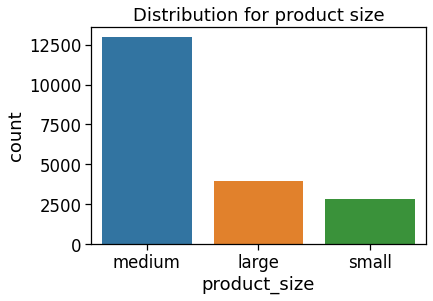

In [47]:
sns.countplot(transaction['product_size'])
plt.title('Distribution for product size')

445.2099999999999


Text(0.5, 0.98, 'Analysis for discount_amt')

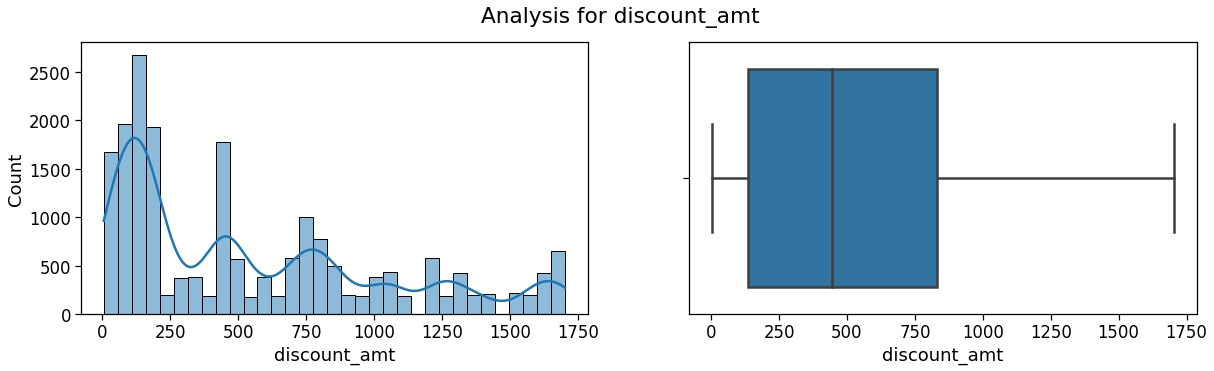

In [45]:
# univariate analysis for numerical variables
i = 'discount_amt'

print(transaction[i].median())
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, axs = plt.subplots(ncols = 2, figsize=(20,5))

sns.histplot(transaction[i], kde=True, ax=axs[0])
sns.boxplot(transaction[i], ax=axs[1])

plt.suptitle('Analysis for '+ i )

In [31]:
# finding out the mean and median for different categories
transaction.groupby(['brand']).agg(mean_lp=('list_price',np.mean), median_lp=('list_price',np.median),
                                   mean_sc=('standard_cost',np.mean), median_sc=('standard_cost',np.median),
                                   mean=('lasted_for_years',np.mean), median=('lasted_for_years',np.median),
                                   median_dis=('discount_amt',np.median))

,mean_lp,median_lp,mean_sc,median_sc,mean,median,median_dis
brand,,,,,,,
Giant Bicycles,1235.407204,1311.44,760.213853,709.48,11.811292,11,448.68
Norco Bicycles,913.202450,958.74,615.029333,521.94,13.921649,14,182.81
OHM Cycles,983.706983,1073.07,496.346208,248.82,13.405521,13,199.10
Solex,1057.271956,1071.23,489.707506,448.90,13.344933,13,437.46
Trek Bicycles,1183.783398,1057.51,569.076308,388.92,12.024749,13,195.34
WeareA2B,1263.454813,1292.84,427.674792,260.14,13.153263,14,834.94


Text(0.5, 1.0, 'Discount given in each product line')

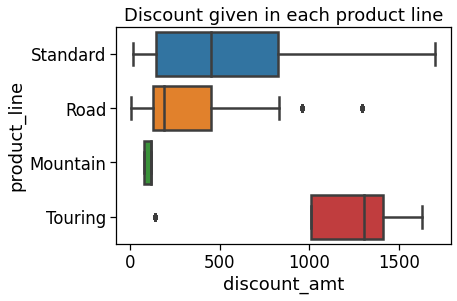

In [41]:
sns.boxplot(y='product_line', x='discount_amt', data=transaction)
plt.title('Discount given in each product line')

Text(0.5, 1.0, 'Correlation between list price and standard cost')

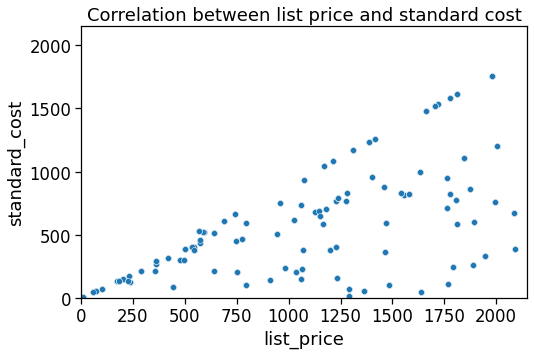

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='list_price', y='standard_cost', data=transaction)
plt.ylim(0, 2150)
plt.xlim(0, 2150)
plt.title('Correlation between list price and standard cost')

# the standard_cost is <= list_price

Text(0.5, 1.0, 'Transaction (daily)')

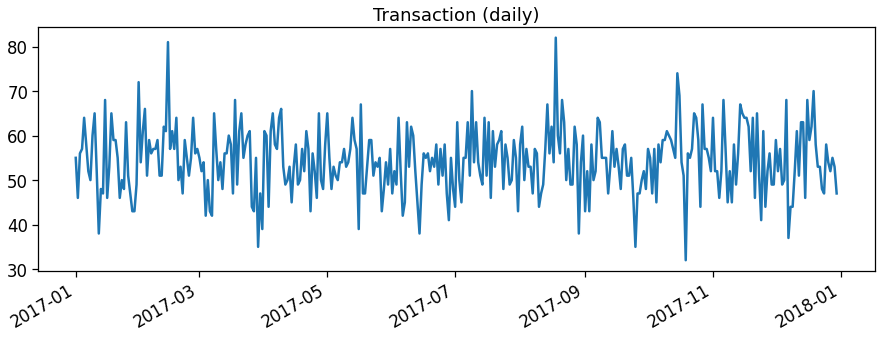

In [38]:
plt.figure(figsize=(15,5))
transaction['transaction_date'].value_counts().plot()
plt.title('Transaction (daily)')

# merge the datas

In [ ]:
data = pd.merge(transaction,demographic,how="inner",on='customer_id')

In [ ]:
data.head()

In [ ]:
data[data['order_status'] == 'Cancelled']['state'].value_counts(normalize=True)

In [ ]:
# Saving the clean data
data.to_csv('/content/drive/MyDrive/KPMG/clean_data.csv')